In [26]:
import matplotlib.pyplot as plt
import pickle5 as pickle
import os
from tqdm import tqdm
import numpy as np
import os
# Import rectangle
from matplotlib.patches import Rectangle

from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes

In [2]:
simulation_length = 1000

with open('./resimulations/resimulation_test_data.pkl', 'rb') as file:
    ground_truth_file = pickle.load(file)

ground_truth = []
t = ground_truth_file['t']

for i in tqdm(range(100)):
    ground_truth.append(ground_truth_file['x'][i*simulation_length:(i+1)*simulation_length])

ground_truth = np.array(ground_truth)

del ground_truth_file

100%|██████████| 100/100 [00:00<00:00, 427990.20it/s]


In [3]:
model_names = sorted(os.listdir('./resimulations'))
model_names.remove('resimulation_test_data.pkl')

In [4]:
COSSIM = {}

In [5]:
for name in tqdm(model_names):
    with open(f'./resimulations/{name}', 'rb') as file:
        resimulation = pickle.load(file)
    COSSIM[name] = np.array([np.sum(ground_truth[i] * resimulation[i], axis=1) / (np.linalg.norm(ground_truth[i], axis=1) * np.linalg.norm(resimulation[i], axis=1)) for i in range(100)])
    COSSIM[name][np.isnan(COSSIM[name])] = 0

100%|██████████| 82/82 [03:56<00:00,  2.88s/it]


In [6]:
mCOSSIM = {}

In [7]:
mCOSSIM['PTAT'] = np.array([COSSIM[name] for name in model_names if name.startswith('PTAT')]).mean(1)
mCOSSIM['pAE'] = np.array([COSSIM[name] for name in model_names if name.startswith('pAE')]).mean(1)
mCOSSIM['R'] = np.array([COSSIM[name] for name in model_names if name.startswith('R')]).mean(1)
mCOSSIM['V'] = np.array([COSSIM[name] for name in model_names if name.startswith('V')]).mean(1)
mCOSSIM['O'] = np.array([COSSIM[name] for name in model_names if name.startswith('O')]).mean(1)

In [8]:
best_models = {name: np.argmax(mCOSSIM[name].sum(1)) for name in mCOSSIM.keys()}
worst_models = {name: np.argmin(mCOSSIM[name].sum(1)) for name in mCOSSIM.keys()}

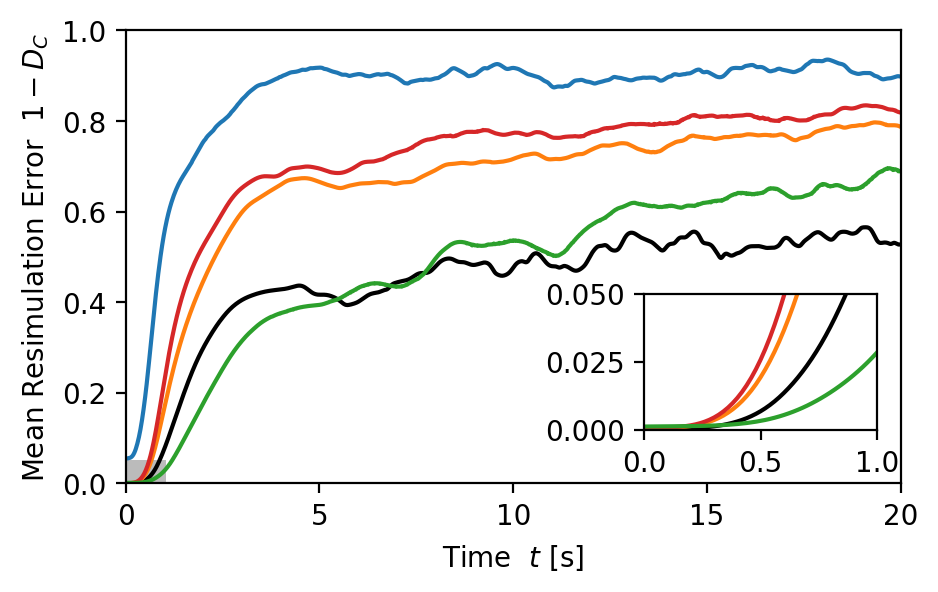

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3), dpi=200)

axins = zoomed_inset_axes(ax, 6, loc=4, bbox_to_anchor=(780/2, 230/2, 1000/2, 1000/2))

for name, longname, color in zip(
    ['O', 'V', 'R', 'PTAT', 'pAE'],
    ['Original', 'Verified', 'Replicated', 'PTAT', 'pAE'],
    ['black', 'tab:orange', 'tab:red', 'tab:green', 'tab:blue']):

    ax.plot(t, 1 - mCOSSIM[name].mean(0), color=f'{color}', label=longname)

    axins.plot(t, 1 - mCOSSIM[name].mean(0), color=f'{color}')
    axins.set_xlim(0, 1)
    axins.set_ylim(0, 0.05)
    axins.set_facecolor((1, 1, 1, 0.8))
    axins.set_yticks([0, 0.025, 0.05])

    # Plot a rectangle to show the zoomed in area
    rect = Rectangle((0, 0), 1, 0.05, fill=True, edgecolor=None, color='#bbb')
    ax.add_patch(rect)

ax.set_xlabel(r'Time  $t$ [s]'), ax.set_ylabel(r'Mean Resimulation Error  $1 - D_C$'); ax.set_xlim(0, 20); ax.set_ylim(0, 1); ax.set_xticks([0, 5, 10, 15, 20]); #ax.legend(loc='upper left'); 